In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

### EDA or understanding the data

In [2]:
# Importing dataset
df = pd.read_csv('./data.csv')

In [3]:
# inspecting
df.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,962c8333,be6db1d7,1,0,22683,320,50,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,5b1f94b9,1b13b020,1,0,17037,320,50,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,a9a84f4c,9a45a8e8,1,0,22155,320,50,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,88c62dad,ea6abc60,0,0,21591,320,50,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,1e5e0d0e,36d749e5,1,0,15708,320,50,1722,0,35,-1,79,10,1,21,8,1


In [4]:
df.shape

(99999, 27)

In [5]:
df.head(1)

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,962c8333,be6db1d7,1,0,22683,320,50,2528,0,39,100075,221,10,1,28,14,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 non-null  int64 
 16  C16               99999 non-null  int64 
 17  C17         

In [7]:
# checking for null values
df.isnull().sum()
# inference no null values

click               0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
month               0
dayofweek           0
day                 0
hour                0
y                   0
dtype: int64

In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
32       False
33       False
34       False
35       False
36       False
37       False
38       False
39       False
40       False
41       False
42       False
43       False
44       False
45       False
46       False
47       False
48       False
49       False
50       False
51       False
52       False
53       False
54       False
55       False
56       False
57       False
58       False
59       False
60       False
61       False
62       False
63       False
64       False
65       False
66       F

In [9]:
# Checking for duplicates
df.duplicated().sum()
# we have about 658 duplicates which implies these entries are identical to a previous row

658

In [10]:
# Extracting the duplicated rows
# df.loc[df.duplicated(keep=False),:]
# keep is used to see the duplicated rows

In [11]:
df.drop_duplicates(inplace=True)
# Dropping duplicates

In [12]:
df.duplicated().sum()
# cross checking

0

In [13]:
# Step 2 analysing each columns individually
df.columns

Index(['click', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category',
       'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip',
       'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16',
       'C17', 'C18', 'C19', 'C20', 'C21', 'month', 'dayofweek', 'day', 'hour',
       'y'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99341 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99341 non-null  bool  
 1   C1                99341 non-null  int64 
 2   banner_pos        99341 non-null  int64 
 3   site_id           99341 non-null  object
 4   site_domain       99341 non-null  object
 5   site_category     99341 non-null  object
 6   app_id            99341 non-null  object
 7   app_domain        99341 non-null  object
 8   app_category      99341 non-null  object
 9   device_id         99341 non-null  object
 10  device_ip         99341 non-null  object
 11  device_model      99341 non-null  object
 12  device_type       99341 non-null  int64 
 13  device_conn_type  99341 non-null  int64 
 14  C14               99341 non-null  int64 
 15  C15               99341 non-null  int64 
 16  C16               99341 non-null  int64 
 17  C17         

In [15]:
df['month'].value_counts()
# as this same throughout, has no unique values hence should be dropped
# also click should be dropped as we already have y

10    99341
Name: month, dtype: int64

In [16]:
df.drop(['month','click'],axis=1,inplace=True)

In [17]:
df.columns

Index(['C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id',
       'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model',
       'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18',
       'C19', 'C20', 'C21', 'dayofweek', 'day', 'hour', 'y'],
      dtype='object')

In [18]:
df['C1'].value_counts()
# This looks fine

1005    91213
1002     5489
1010     2263
1012      253
1007       93
1001       21
1008        9
Name: C1, dtype: int64

In [19]:
df['banner_pos'].value_counts()

0    71284
1    27888
7      107
2       30
4       19
5        9
3        4
Name: banner_pos, dtype: int64

In [20]:
df['site_id'].unique().size

1485

In [21]:
df['device_id'].unique().size
# remove

16801

In [22]:
df['app_id'].unique().size

1354

In [23]:
df['C14'].unique().size

1722

In [24]:
df['C15'].unique().size

8

In [25]:
df['C16'].unique().size

9

In [26]:
df['C16'].unique().size

9

In [27]:
df['C17'].unique().size

399

In [28]:
df['C18'].unique().size

4

In [29]:
df['C19'].unique().size

64

In [30]:
df['C19'].unique().size

64

In [31]:
df['C20'].unique().size

154

In [32]:
df['C21'].unique().size

60

In [33]:
df['app_category'].unique().size

21

In [34]:
df['app_domain'].unique().size

96

In [35]:
df['app_id'].unique().size

1354

In [36]:
df['app_category'].unique().size

21

In [37]:
df['app_domain'].unique().size

96

In [38]:
df['banner_pos'].unique().size

7

In [39]:
df['day'].unique().size

10

In [40]:
df['dayofweek'].unique().size

7

In [41]:
df['device_conn_type'].unique().size

4

In [42]:
df['device_id'].unique().size
# remove

16801

In [43]:
df['device_ip'].unique().size
# definetly remove+

78013

In [44]:
df['device_model'].unique().size

3145

In [45]:
df['device_type'].unique().size

4

In [46]:
df['site_category'].unique().size

19

In [47]:
df['site_domain'].unique().size

1331

In [48]:
df['site_id'].unique().size

1485

In [49]:
df.drop(['device_ip','device_id'],axis=1,inplace=True)

In [50]:
df.columns

Index(['C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id',
       'app_domain', 'app_category', 'device_model', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'dayofweek', 'day', 'hour', 'y'],
      dtype='object')

### Outlier detection in C1, C14-C21 Visualizing Numeric Values

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
# Creating dataset for numeric data
# sns.pairplot(df)
df_numeric = df.drop(['banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id',
       'app_domain', 'app_category', 'device_model', 'device_type',
       'device_conn_type', 'dayofweek', 'day', 'hour'],axis=1,inplace=False)

In [60]:
df_numeric.columns


Index(['C1', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'y'], dtype='object')

In [62]:
df.columns

Index(['C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id',
       'app_domain', 'app_category', 'device_model', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'dayofweek', 'day', 'hour', 'y'],
      dtype='object')

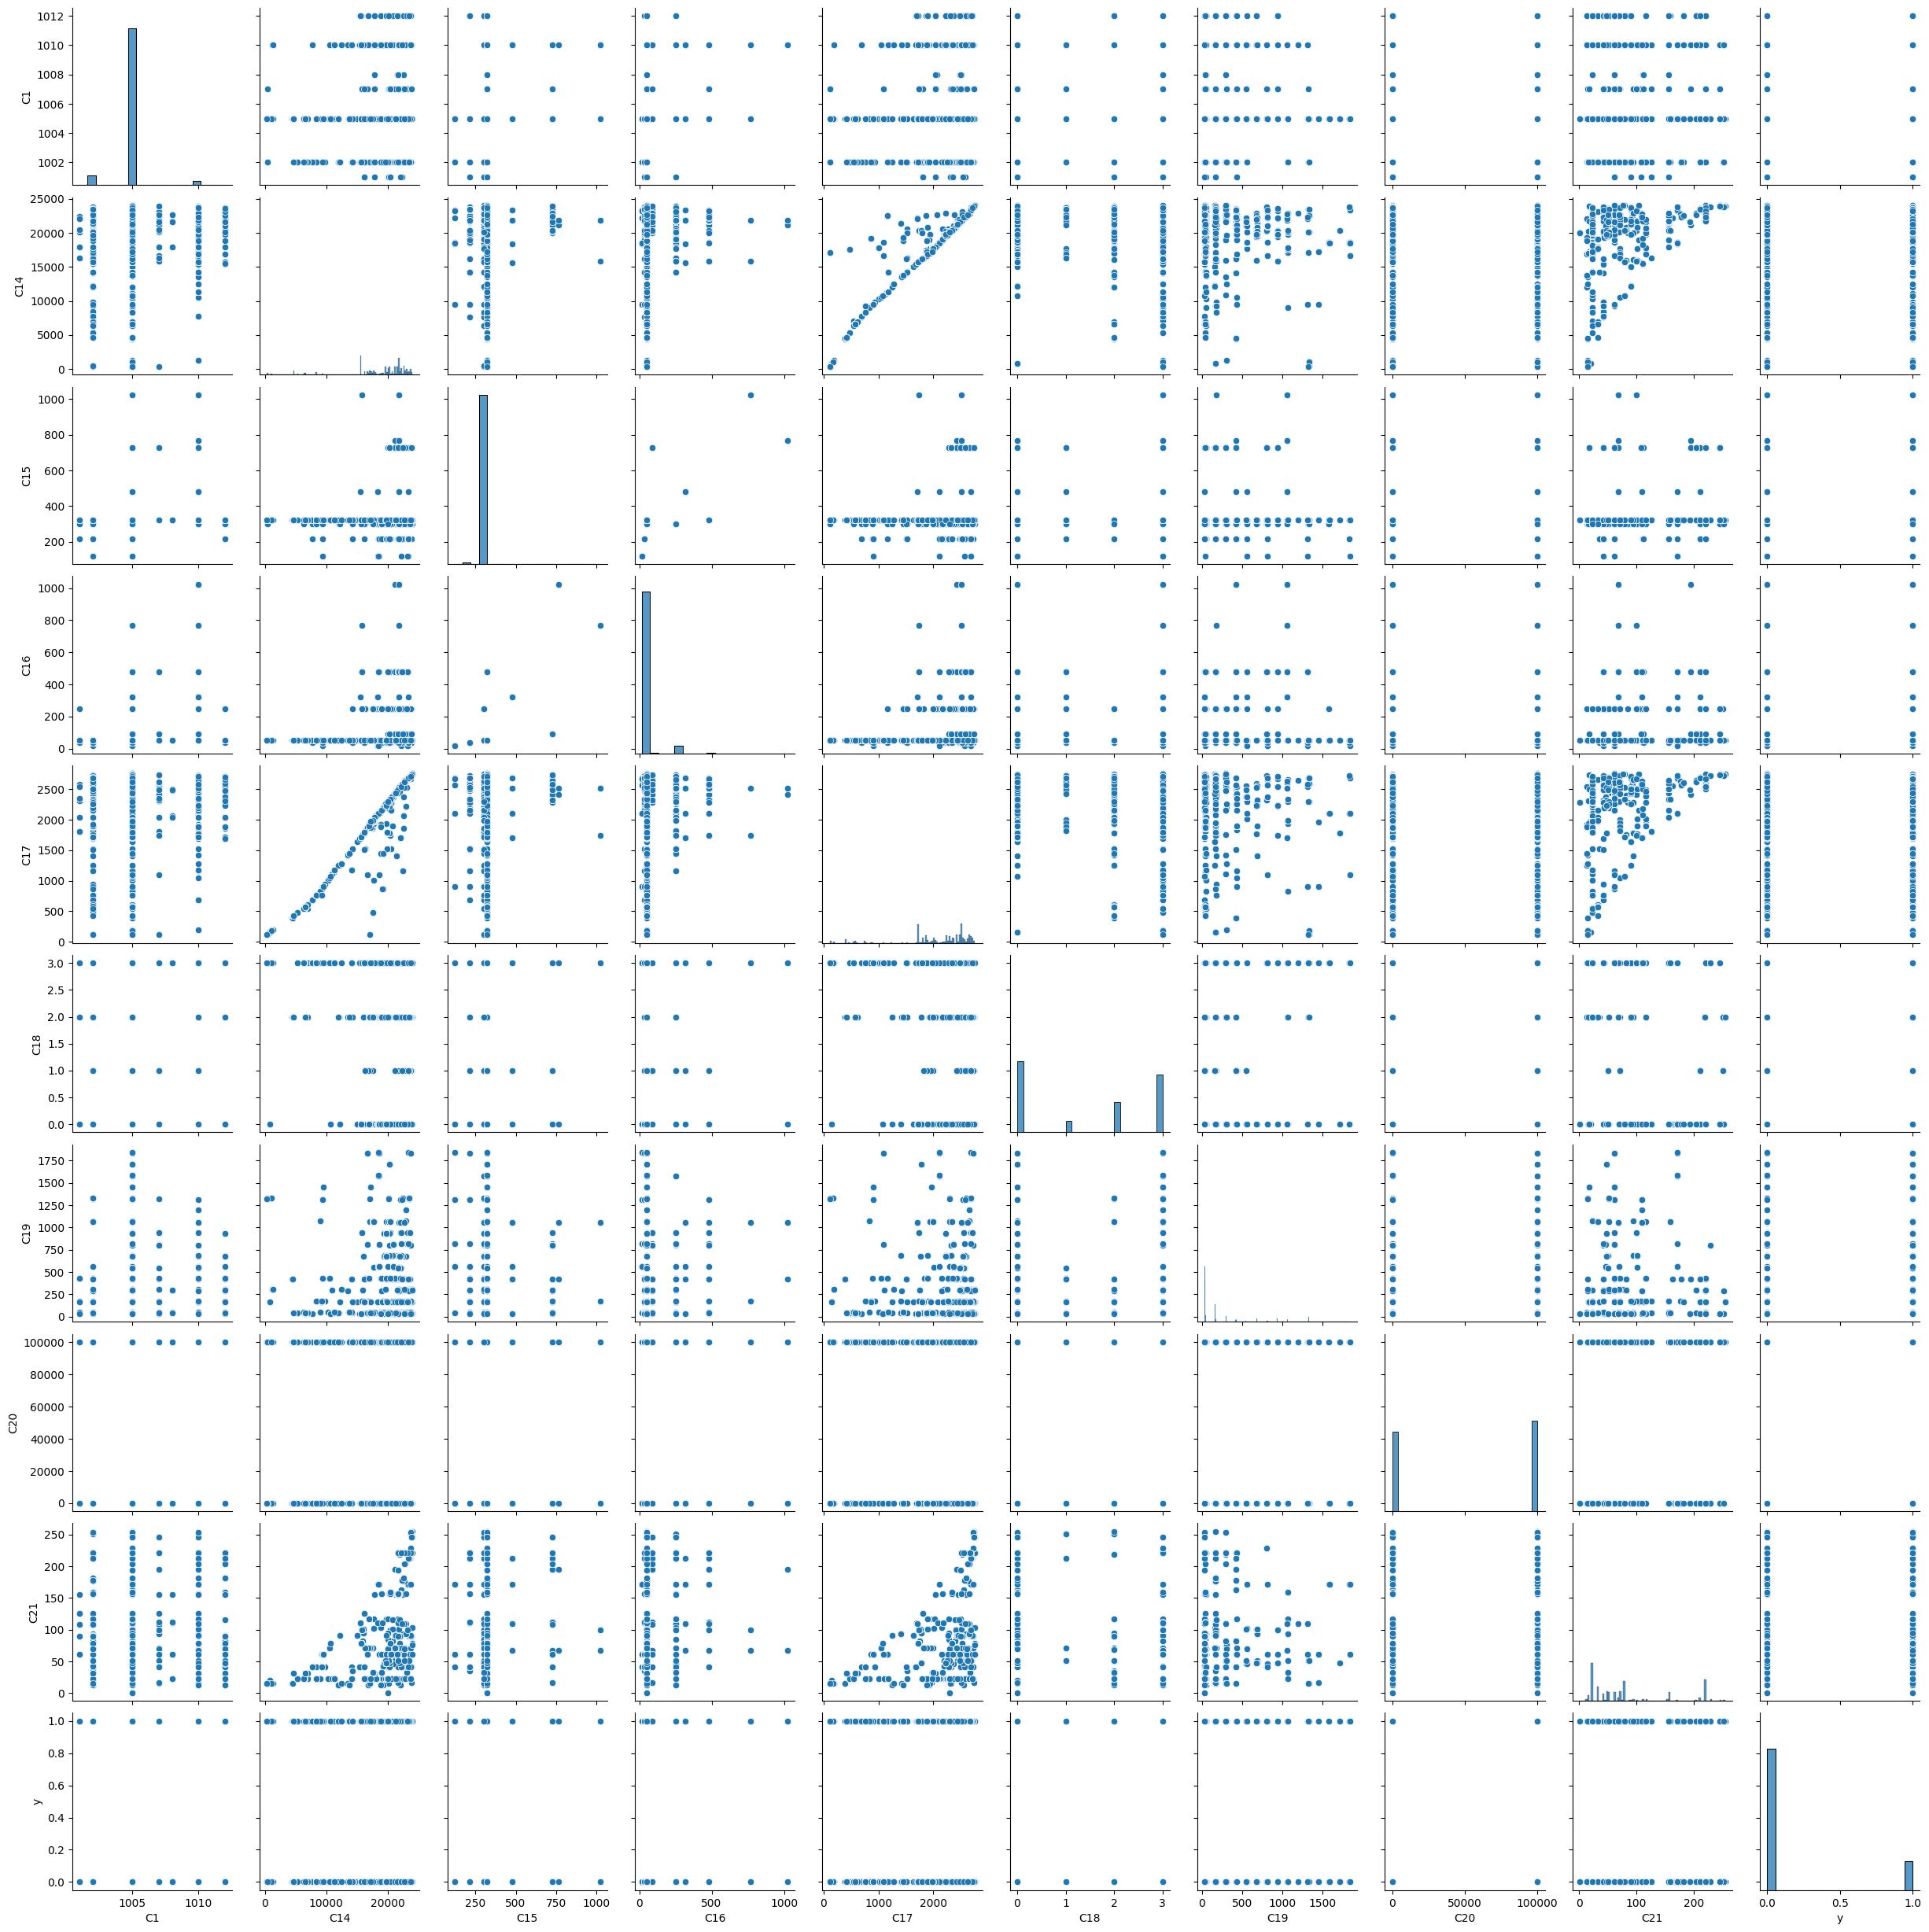

In [63]:
# Pairplot of numeric data to determine the relation 
sns.pairplot(df_numeric)
plt.show()


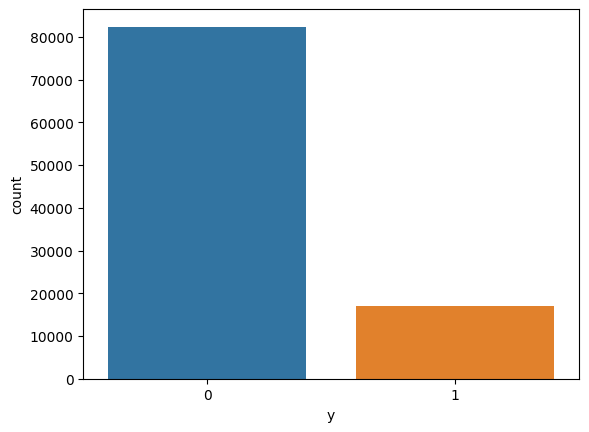

In [65]:
sns.countplot(x='y',data=df)
plt.show()
# highly imbalanced dataset most people did not click 

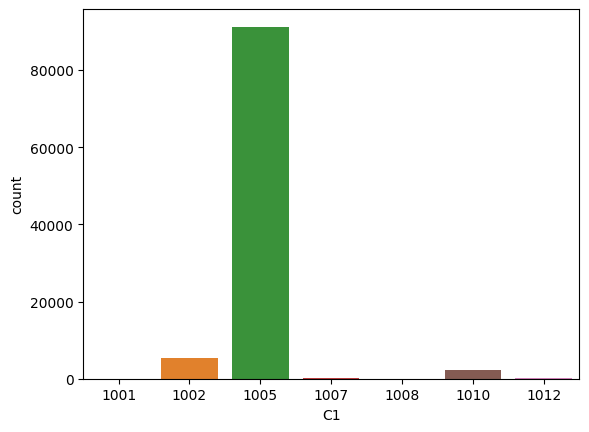

In [66]:
sns.countplot(x='C1',data=df)
plt.show()

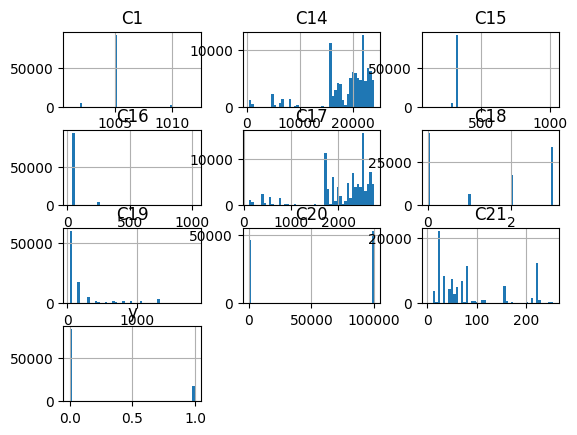

In [68]:
df_numeric.hist(bins=50)
plt.show()